In [1]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import RidgeCV
%load_ext autoreload
%autoreload 2

from GLM_regression import *

plt.rcParams.update({'font.size': 10,
                    'axes.spines.right': False,
                    'axes.spines.top':   False,
                    'legend.frameon':       False,})


# plt.rcParams.update({'font.size': 10,
#                     'axes.spines.right': False,
#                     'axes.spines.top':   False,
#                     'legend.frameon':       False,
#                     'font.sans-serif': 'Helvetica',
#                     'svg.fonttype': 'none'})

R2: 0.8053189988819718
alpha: 1.0


/Users/ag1880/github-repos/Milstein-Lab/interneuron-glm/GLM_regression.py:208: RuntimeWarning: invalid value encountered in divide
  ax.plot(pred_norm, label='GLM prediction', c='gray', linestyle='--')


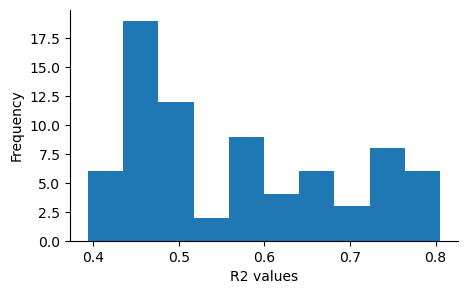

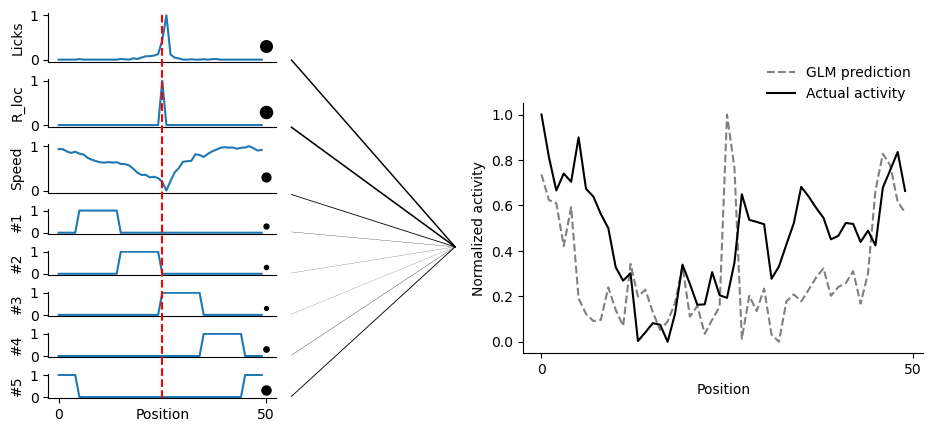

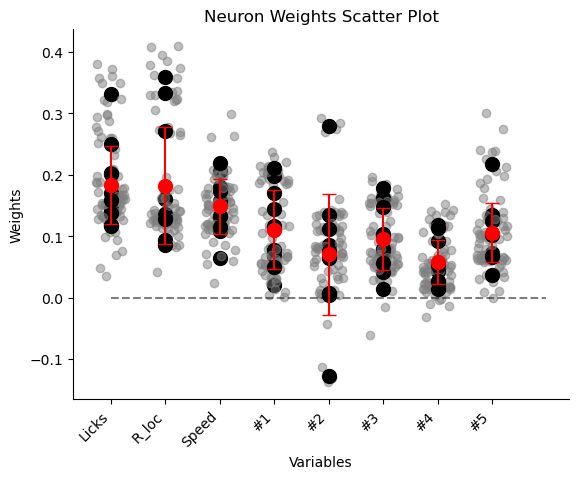

In [52]:
filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
# filepath = "EC_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=None)    

all_R2_values = []
for animal in GLM_params:
    for neuron in GLM_params[animal]:
        all_R2_values.append(GLM_params[animal][neuron]['R2'])
all_R2_values = np.array(all_R2_values)
fig, ax = plt.subplots(figsize=(5,3))
ax.hist(all_R2_values.flatten(), bins=10)
ax.set_xlabel("R2 values")
ax.set_ylabel("Frequency")

example_animal='animal_6'
plot_example_neuron(example_animal, reorganized_data, GLM_params, variable_list, trial=22)

plot_GLM_summary_data(GLM_params, variable_list, model_name=filepath, save=False, ax=None)

plt.show()

<BarContainer object of 8 artists>

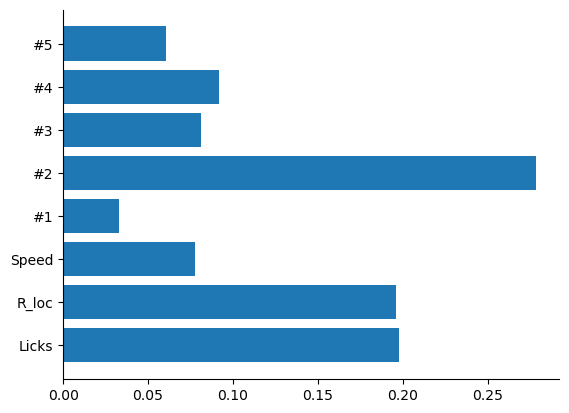

In [10]:
neuron_nr = 2

# Bar graph
plt.barh(variable_list[1:], GLM_params['animal_1'][neuron_nr]['weights'])